In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-ratings/chocolate_makers.csv
/kaggle/input/chocolate-ratings/chocolate_ratings.csv


**Importing Libraries**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the Dataset**

In [3]:
df = pd.read_csv('../input/chocolate-ratings/chocolate_ratings.csv')
makerdf = pd.read_csv('../input/chocolate-ratings/chocolate_makers.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


**Checking the data**

In [4]:
df.head(10)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70%,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75


In [5]:
makerdf.head(10)

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
0,Choklat,Calgary,Alberta,Brad Churchill,Canada
1,Yukon Chocolate Company,Calgary,Alberta,Sydney Oland,Canada
2,Kin+Pod,Calgary,Alberta,Georden Spicer,Canada
3,Goldie,Calgary,Alberta,Amy Horne (instagram),Canada
4,Moth Chocolate,Calgary,Alberta,Geordan Spicer (mothchocolate.com),Canada
5,Ten Degrees,Calgary,Alberta,"Mark, Michele Scott, Bianca",Canada
6,The Jones Chocolate Co.,Edmonton,Alberta,Curtis Jones,Canada
7,Au Chocolat,Morinville,Alberta,Tammy MacDonald,Canada
8,Jacek,Sherwood Park,Alberta,"Jacqueline Jacek, Curtis Jones",Canada
9,Take a Fancy,Burnaby,British Columbia,Becks D'Angelo,Canada


**Basic information about the data**

In [6]:
def info(df):
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())

info(df)

Number of Instances: 2530
Number of Features: 10

Summary:
               REF  Review Date       Rating
count  2530.000000  2530.000000  2530.000000
mean   1429.800791  2014.374308     3.196344
std     757.648556     3.968267     0.445321
min       5.000000  2006.000000     1.000000
25%     802.000000  2012.000000     3.000000
50%    1454.000000  2015.000000     3.250000
75%    2079.000000  2018.000000     3.500000
max    2712.000000  2021.000000     4.000000

Missing Values:
REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64


**Making changes to make the data more readable**

In [7]:
cols = list(df.columns)
def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))

# handling the feature name company
new_feature_names = rec_features(cols)
new_feature_names[0] = "company"

# Re-assigning feature names
df=df.rename(columns=dict(zip(df.columns,new_feature_names)))
df.dtypes

Feature Names before Cleaning:
['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date', 'Country of Bean Origin', 'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics', 'Rating']

Feature Names after Cleaning:
['ref', 'company_(manufacturer)', 'company_location', 'review_date', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name', 'cocoa_percent', 'ingredients', 'most_memorable_characteristics', 'rating']


company                               int64
company_(manufacturer)               object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                        object
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

In [8]:
#Convert cocoa % to float
df['cocoa_percent']=df['cocoa_percent'].str.replace('%','').astype(float)/100

**Exploring the Data**

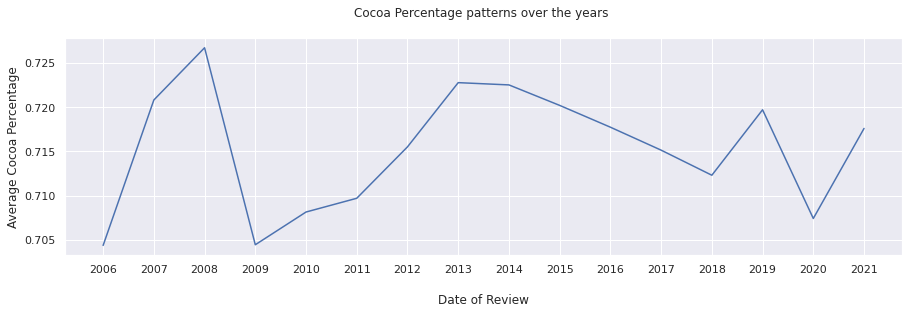

In [9]:
#Lets check with Cocoa %
import seaborn as sns
dcoco = df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
dcoco = dcoco.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=dcoco)
ax.set(xticks=dcoco.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()


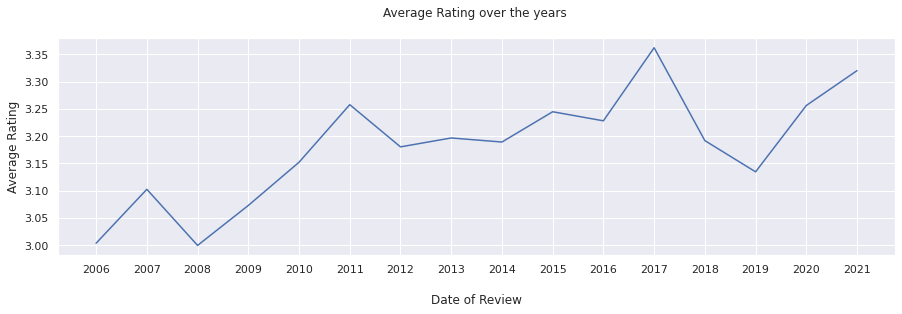

In [10]:
#Now lets check the change of rating of chocolate
drate = df.groupby('review_date').aggregate({'rating':'mean'})
drate = drate.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', data=drate)
ax.set(xticks=drate.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

From this we can notice that 2008 and 2009 has large declination of the rating of chocolate and thats when the companies tried experimenting and tried adding more cocoa in the chocolate

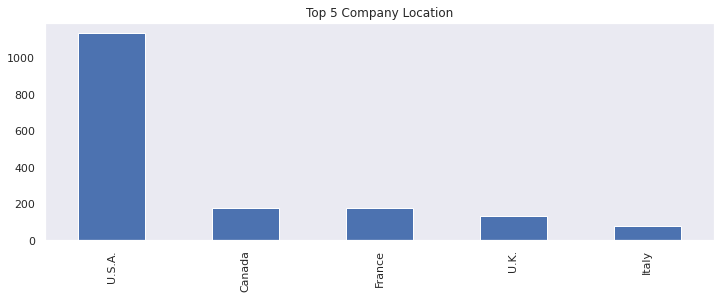

In [11]:
top5company = df['company_location'].value_counts()[0:5]
plt.figure(figsize=(12,4))
top5company.plot(kind='bar')
plt.title('Top 5 Company Location')
plt.grid()
plt.show()


USA stands first in company location

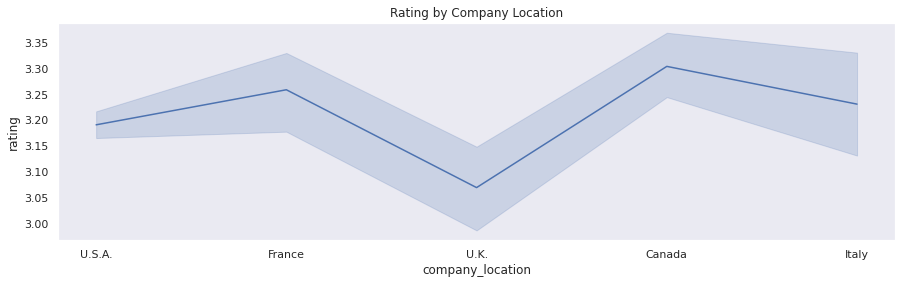

In [12]:
#Trying to find the rating by Company Location
temp_list = top5company.index.tolist()
df_temp = df[df['company_location'].isin(temp_list)]

plt.figure(figsize=(15,4))
sns.lineplot(data = df_temp, x='company_location', y='rating')
plt.title('Rating by Company Location')
#plt.xticks(rotation=90)
plt.grid()
plt.show()

Rating: 3.5 Reviews: 565
Rating: 3.0 Reviews: 523
Rating: 3.25 Reviews: 464
Rating: 2.75 Reviews: 333
Rating: 3.75 Reviews: 300
Rating: 2.5 Reviews: 166
Rating: 4.0 Reviews: 112
Rating: 2.0 Reviews: 33
Rating: 2.25 Reviews: 17
Rating: 1.5 Reviews: 10
Rating: 1.0 Reviews: 4
Rating: 1.75 Reviews: 3


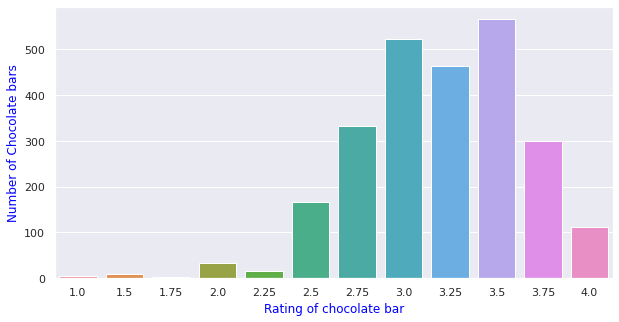

In [13]:
# The counts of each rating
r=list(df['rating'].value_counts())
rating=df['rating'].value_counts().index.tolist()
rat=dict(zip(rating,r))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

Top Chocolate Producing Countries in the World

U.S.A.    1136
Canada     177
France     176
U.K.       133
Italy       78
Name: company_location, dtype: int64


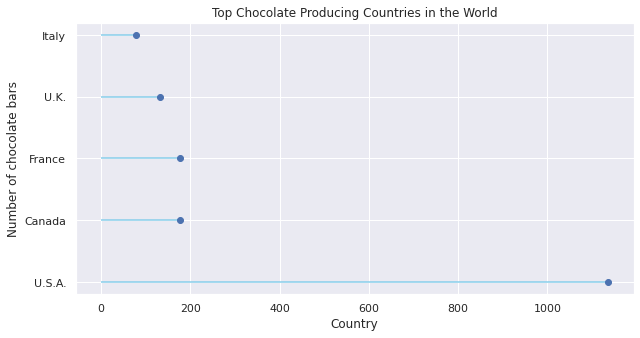

In [14]:
print ('Top Chocolate Producing Countries in the World\n')
country=list(df['company_location'].value_counts().head(5).index)
choco_bars=list(df['company_location'].value_counts().head(5))
prod_ctry=dict(zip(country,choco_bars))
print(df['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

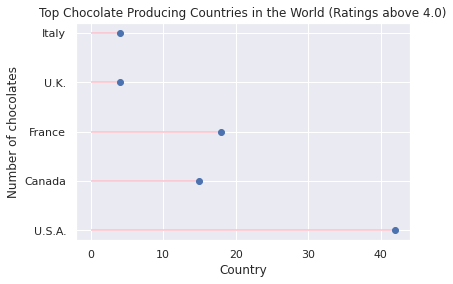

{'U.S.A.': 42, 'Canada': 15, 'France': 18, 'U.K.': 4, 'Italy': 4}


In [15]:
countries=country
best_choc={}
for j in countries:
    c=0
    b=df[df['company_location']==j]
    br=b[b['rating']>=4] 
    for i in br['rating']:
        c+=1
        best_choc[j]=c    


li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='pink')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolates')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)

USA is the top chocolate producing country and also highest rating chocolates